## Lab 7 Tasks - Solutions

In [1]:
import pandas as pd
%matplotlib inline

Step 1. 
Load the book catalogue dataset *book-catalogue.csv* into a Pandas DataFrame, and set the row index of the DataFrame to be the title of the books.

In [2]:
df = pd.read_csv("book-catalogue.csv")
df = df.set_index("title")
df.head()

,author,author_gender,author_nationality,year,num_chapters,num_characters,num_words
title,,,,,,,
Belinda,Maria Edgeworth,Female,Irish,1800,31,182,173195
Castle Rackrent,Maria Edgeworth,Female,Irish,1800,9,78,27678
Ennui,Maria Edgeworth,Female,Irish,1809,22,289,74454
Sense and Sensibility,Jane Austen,Female,British,1811,50,158,123774
The Absentee,Maria Edgeworth,Female,Irish,1812,17,275,99608


Step 2. Plot (i) the number of chapters against the number of characters; (ii) the number of chapters against the number of words. 

Do the plots suggest a correlation in either case?

Text(0,0.5,'Number of Characters')

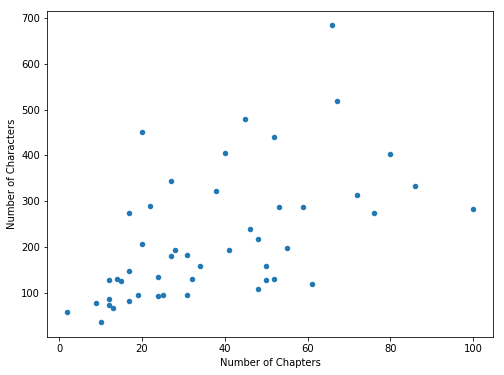

In [3]:
p1 = df.plot(kind="scatter",x="num_chapters", y="num_characters",figsize=(8,6))
p1.set_xlabel("Number of Chapters")
p1.set_ylabel("Number of Characters")

Text(0,0.5,'Number of Words')

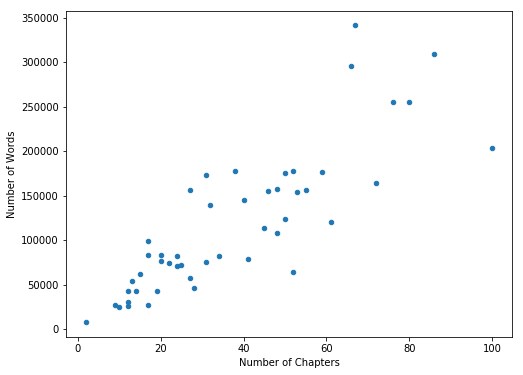

In [4]:
p2 = df.plot(kind="scatter",x="num_chapters", y="num_words",figsize=(8,6))
p2.set_xlabel("Number of Chapters")
p2.set_ylabel("Number of Words")

Step 3. Plot (i) the proportion of male and female authors; (ii) the proportion of Irish and British authors.

Text(0,0.5,'')

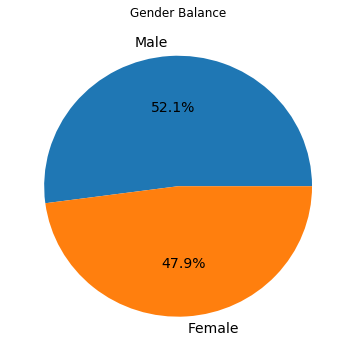

In [5]:
# get the counts for the gender values
gender_counts = df["author_gender"].value_counts()
# create pie chart of the counts
p3 = gender_counts.plot(kind="pie", autopct="%.1f%%", fontsize=14, figsize=(6,6))
p3.set_title("Gender Balance")
p3.set_ylabel("")

Text(0,0.5,'')

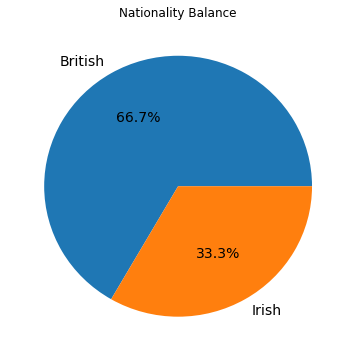

In [6]:
# get the counts of the nationality values
nation_counts = df["author_nationality"].value_counts()
# display as a pie chart
p3 = nation_counts.plot(kind="pie", autopct="%.1f%%", fontsize=14, figsize=(6,6))
p3.set_title("Nationality Balance")
p3.set_ylabel("")

Step 4. Plot the number of books per decade in the catalogue. Save this plot to a PNG file.

In [7]:
# Work out the decade for each book
decades = []
for i, row in df.iterrows():
    syear = str(row["year"])
    decades.append( syear[0:3] +"0s" )

In [8]:
# Add it as a new column
df["decade"] = decades
df.head()

,author,author_gender,author_nationality,year,num_chapters,num_characters,num_words,decade
title,,,,,,,,
Belinda,Maria Edgeworth,Female,Irish,1800,31,182,173195,1800s
Castle Rackrent,Maria Edgeworth,Female,Irish,1800,9,78,27678,1800s
Ennui,Maria Edgeworth,Female,Irish,1809,22,289,74454,1800s
Sense and Sensibility,Jane Austen,Female,British,1811,50,158,123774,1810s
The Absentee,Maria Edgeworth,Female,Irish,1812,17,275,99608,1810s


In [9]:
# Calculate the counts for each decade
decade_counts = df["decade"].value_counts()
# Sort them by decade
sorted_decade_counts = decade_counts.sort_index()

Text(0,0.5,'Number of Books')

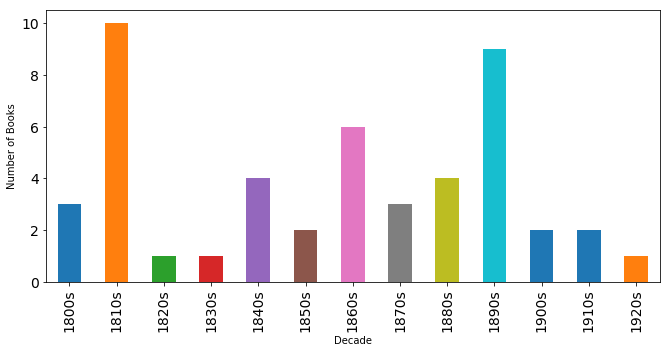

In [10]:
# Produce the bar chart
p4 = sorted_decade_counts.plot(kind="bar", fontsize=14, figsize=(11,5))
p4.set_xlabel("Decade")
p4.set_ylabel("Number of Books")

In [11]:
fig = p4.get_figure()
# A fix to make sure the figure does not get cropped
fig.tight_layout()
# Save the figure
fig.savefig("decades.png")